# Name: Syed Noor Hussain Shah
# Project: EEG-Based Seizure Detection Using Machine Learning
# Teacher: Dr. Adnan Amin
# April 2025

#Importing Google Drive in Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from re import X
X_train_path = "/content/drive/MyDrive/data_aligned/x_train.npy"
X_test_path = "/content/drive/MyDrive/data_aligned/x_test.npy"
y_train_path = "/content/drive/MyDrive/data_aligned/y_train.npy"
y_test_path = "/content/drive/MyDrive/data_aligned/y_test.npy"


X_train =np.load(X_train_path)
X_test =np.load(X_test_path)
Y_train =np.load(y_train_path)
Y_test =np.load(y_test_path)



print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", Y_train)
print("Y_test:\n", Y_test)


X_train:
 [[[-2.77640155e-03 -1.76932077e-03 -1.03689838e-03 ... -8.54422786e-03
   -8.45267506e-03 -8.39163986e-03]
  [ 3.57125914e-03  3.75436474e-03  3.78488234e-03 ... -1.77300253e-02
   -1.82793421e-02 -1.84929653e-02]
  [ 4.97506872e-03  3.75436474e-03  4.18161113e-03 ... -1.91338349e-02
   -1.79131309e-02 -1.73943317e-02]
  ...
  [ 4.91403352e-03  3.11349515e-03  1.25192158e-03 ... -1.89139117e-03
   -3.56985914e-03 -4.82108072e-03]
  [ 5.89059670e-03  1.12922118e-02  1.51069117e-02 ... -1.73880317e-03
   -2.50174316e-03 -3.44778874e-03]
  [-8.05594626e-03 -6.31644309e-03 -5.61453830e-03 ... -1.49466237e-03
   -2.65433115e-03 -3.47830634e-03]]

 [[-2.16604956e-03 -3.11209515e-03 -3.99710553e-03 ... -1.88591765e-02
   -2.06291973e-02 -2.23076652e-02]
  [-9.36820304e-03 -9.85648463e-03 -1.02226958e-02 ... -5.46195031e-03
   -6.65213669e-03 -7.81180547e-03]
  [-9.18509744e-03 -9.88700223e-03 -1.03752838e-02 ... -2.59697772e-02
   -2.86858435e-02 -3.14019099e-02]
  ...
  [-1.2694621

In [ ]:
print("Shape of x_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)

Shape of x_train: (6232, 19, 500)
Shape of y_train: (6232,)
Shape of x_test: (1558, 19, 500)
Shape of y_test: (1558,)


#Counting and Displaying Label Distribution in Training and Test Sets

In [ ]:



unique_train, counts_train = np.unique(Y_train, return_counts=True)
unique_test, counts_test = np.unique(Y_test, return_counts=True)

print("Training labels distribution:")
for label, count in zip(unique_train, counts_train):
    print(f"Label {label}: {count}")

print("\nTest labels distribution:")
for label, count in zip(unique_test, counts_test):
    print(f"Label {label}: {count}")


Training labels distribution:
Label 0: 3140
Label 1: 2412
Label 2: 600
Label 3: 80

Test labels distribution:
Label 0: 755
Label 1: 622
Label 2: 150
Label 3: 31


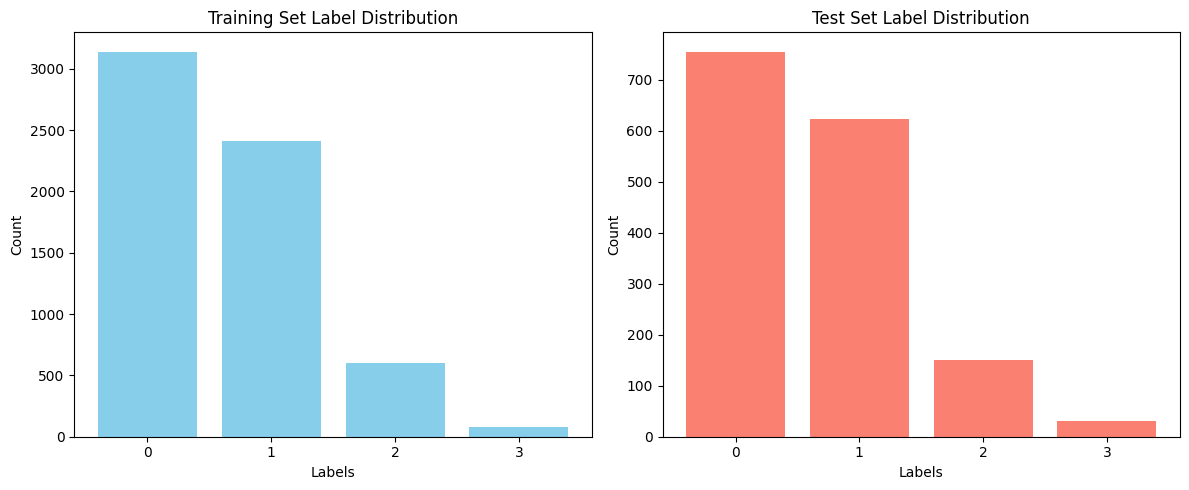

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count label frequencies
unique_train, counts_train = np.unique(Y_train, return_counts=True)
unique_test, counts_test = np.unique(Y_test, return_counts=True)

# Set up the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training set distribution
axs[0].bar(unique_train, counts_train, color='skyblue')
axs[0].set_title('Training Set Label Distribution')
axs[0].set_xlabel('Labels')
axs[0].set_ylabel('Count')
axs[0].set_xticks(unique_train)

# Plot test set distribution
axs[1].bar(unique_test, counts_test, color='salmon')
axs[1].set_title('Test Set Label Distribution')
axs[1].set_xlabel('Labels')
axs[1].set_ylabel('Count')
axs[1].set_xticks(unique_test)

plt.tight_layout()
plt.show()


# value ranges of training set

In [ ]:

print("x_train min:", np.min(X_train))
print("x_train max:", np.max(X_train))
print("x_train mean:", np.mean(X_train))


x_train min: -1.0
x_train max: 1.0
x_train mean: -2.579712397629358e-06


x_train min: -1.0
x_train max: 1.0
x_train mean: -2.579712397629358e-06


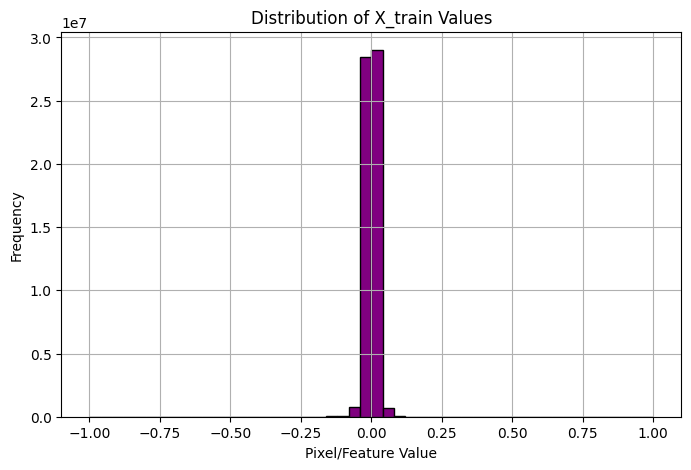

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Print summary statistics
print("x_train min:", np.min(X_train))
print("x_train max:", np.max(X_train))
print("x_train mean:", np.mean(X_train))

# Flatten the array if it's multidimensional (e.g., images)
X_train_flat = X_train.flatten()

# Plot histogram of X_train values
plt.figure(figsize=(8, 5))
plt.hist(X_train_flat, bins=50, color='purple', edgecolor='black')
plt.title('Distribution of X_train Values')
plt.xlabel('Pixel/Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import os

# Create save directory
save_dir = '/content/drive/MyDrive/Npy_files/eeg_figures/chord_diagrams'
os.makedirs(save_dir, exist_ok=True)

# Function to plot EEG inter-channel correlation as a circular chord diagram
def plot_chord_diagram(sample, label, channel_count=19):
    corr_matrix = np.corrcoef(sample)
    threshold = 0.6  # Only show strong correlations

    # Circular positions for channels
    theta = np.linspace(0, 2 * np.pi, channel_count, endpoint=False)
    node_x = np.cos(theta)
    node_y = np.sin(theta)
    channel_names = [f'Ch{i+1}' for i in range(channel_count)]

    # Create figure
    fig = go.Figure()

    # Add connections (edges)
    for i in range(channel_count):
        for j in range(i+1, channel_count):
            weight = corr_matrix[i, j]
            if abs(weight) >= threshold and i != j:
                x_vals = [node_x[i], node_x[j]]
                y_vals = [node_y[i], node_y[j]]
                fig.add_trace(go.Scatter(
                    x=x_vals,
                    y=y_vals,
                    mode='lines',
                    line=dict(width=2, color='red' if weight > 0 else 'blue'),
                    opacity=min(1.0, abs(weight)),
                    hoverinfo='text',
                    text=f'{channel_names[i]} ⇄ {channel_names[j]}: {weight:.2f}'
                ))

    # Add nodes (EEG channels)
    fig.add_trace(go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',
        marker=dict(size=20, color='lightgreen'),
        text=channel_names,
        textposition='top center',
        hoverinfo='text',
    ))

    fig.update_layout(
        title=f'Chord Diagram (EEG Channel Correlation) - Label {label}',
        showlegend=False,
        margin=dict(t=50, l=20, r=20, b=20),
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        plot_bgcolor='white'
    )

    # Save as HTML (interactive)
    html_path = os.path.join(save_dir, f'Chord_Diagram_Label_{label}.html')
    fig.write_html(html_path)
    print(f"Interactive chord diagram saved: {html_path}")

    fig.show()

# Call the function for one sample per label
labels = [0, 1, 2, 3]
for label in labels:
    idx = np.where(Y_train == label)[0][0]
    sample = X_train[idx]
    plot_chord_diagram(sample, label)



Interactive chord diagram saved: /content/drive/MyDrive/Npy_files/eeg_figures/chord_diagrams/Chord_Diagram_Label_0.html


Interactive chord diagram saved: /content/drive/MyDrive/Npy_files/eeg_figures/chord_diagrams/Chord_Diagram_Label_1.html


Interactive chord diagram saved: /content/drive/MyDrive/Npy_files/eeg_figures/chord_diagrams/Chord_Diagram_Label_2.html


Interactive chord diagram saved: /content/drive/MyDrive/Npy_files/eeg_figures/chord_diagrams/Chord_Diagram_Label_3.html


# spliting data

In [ ]:



from sklearn.model_selection import train_test_split

# Flatten EEG data (7011, 19, 500) → (7011, 9500)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("Flattened training data shape:", X_train_flat.shape)
print("Flattened test data shape:", X_test_flat.shape)


Flattened training data shape: (6232, 9500)
Flattened test data shape: (1558, 9500)


# Models
. XGBoost
. soft-voting ensemble
. Random Forest


In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Initialize individual models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Combine models into a soft voting ensemble
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    voting='soft'  # soft voting uses predicted probabilities
)

# Train ensemble model
ensemble_model.fit(X_train_flat, Y_train)

# Predict on test set
ensemble_preds = ensemble_model.predict(X_test_flat)

# Evaluate ensemble performance
print("Ensemble Classification Report:")
print(classification_report(Y_test, ensemble_preds))
print("Ensemble Weighted F1-Score:", f1_score(Y_test, ensemble_preds, average='weighted'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       755
           1       0.96      0.83      0.89       622
           2       0.96      0.80      0.87       150
           3       1.00      0.42      0.59        31

    accuracy                           0.90      1558
   macro avg       0.94      0.76      0.82      1558
weighted avg       0.90      0.90      0.89      1558

Ensemble Weighted F1-Score: 0.8926532317485041


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train_flat, Y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_flat)

# Evaluate the performance
print("XGBoost Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:29:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       755
           1       0.95      0.83      0.89       622
           2       0.94      0.80      0.86       150
           3       1.00      0.45      0.62        31

    accuracy                           0.89      1558
   macro avg       0.93      0.77      0.82      1558
weighted avg       0.90      0.89      0.89      1558


Confusion Matrix:
 [[741   9   5   0]
 [100 519   3   0]
 [ 24   6 120   0]
 [  5  12   0  14]]


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_flat, Y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test_flat)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(Y_test, rf_preds))
print("Random Forest Weighted F1-Score:", f1_score(Y_test, rf_preds, average='weighted'))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       755
           1       0.93      0.84      0.88       622
           2       0.96      0.51      0.66       150
           3       1.00      0.32      0.49        31

    accuracy                           0.86      1558
   macro avg       0.93      0.66      0.73      1558
weighted avg       0.88      0.86      0.86      1558

Random Forest Weighted F1-Score: 0.856021837540797


#Feature Engineering

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Set a variance threshold — remove features with near-zero variance
selector = VarianceThreshold(threshold=0.0001)  # adjust threshold if needed
X_train_fs = selector.fit_transform(X_train_flat)
X_test_fs = selector.transform(X_test_flat)

print("New shape after feature selection:", X_train_fs.shape)


New shape after feature selection: (6232, 9000)


# Data Balacing
..... SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_fs, Y_train)

print("New training set shape after SMOTE:", X_train_balanced.shape)
print("New label distribution:", np.bincount(Y_train_balanced))


New training set shape after SMOTE: (12560, 9000)
New label distribution: [3140 3140 3140 3140]


In [ ]:
#Data Balancing — SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_fs, Y_train)

print("New training set shape after SMOTE:", X_train_balanced.shape)
print("New label distribution:", np.bincount(Y_train_balanced))


New training set shape after SMOTE: (12560, 9000)
New label distribution: [3140 3140 3140 3140]


# After Balacing data

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model on balanced and feature-selected data
xgb_model.fit(X_train_balanced, Y_train_balanced)

# Predict on the test data (feature-selected only)
y_pred = xgb_model.predict(X_test_fs)

# Evaluate performance
print("XGBoost Accuracy (with FS + SMOTE):", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[07:16:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy (with FS + SMOTE): 0.9005134788189987

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       755
           1       0.95      0.86      0.90       622
           2       0.81      0.87      0.84       150
           3       1.00      0.65      0.78        31

    accuracy                           0.90      1558
   macro avg       0.91      0.83      0.86      1558
weighted avg       0.90      0.90      0.90      1558


Confusion Matrix:
 [[718  19  18   0]
 [ 80 534   8   0]
 [ 15   4 131   0]
 [  1   6   4  20]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, Y_train_balanced)

# Predict on the test set (after feature selection only)
rf_preds = rf_model.predict(X_test_fs)

# Evaluate the model
print("Random Forest Accuracy (with FS + SMOTE):", accuracy_score(Y_test, rf_preds))
print("\nClassification Report:\n", classification_report(Y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_preds))
print("Random Forest Weighted F1-Score:", f1_score(Y_test, rf_preds, average='weighted'))



Random Forest Accuracy (with FS + SMOTE): 0.8741976893453145

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       755
           1       0.92      0.86      0.89       622
           2       0.71      0.80      0.75       150
           3       0.91      0.65      0.75        31

    accuracy                           0.87      1558
   macro avg       0.85      0.80      0.82      1558
weighted avg       0.88      0.87      0.87      1558

Confusion Matrix:
 [[689  28  38   0]
 [ 77 533  10   2]
 [ 23   7 120   0]
 [  1  10   0  20]]
Random Forest Weighted F1-Score: 0.8745434484459286


In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

# Initialize individual models (no need for class_weight now due to SMOTE)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    voting='soft'  # soft voting uses predicted probabilities
)

# Fit on the balanced and feature-selected training data
ensemble_model.fit(X_train_balanced, Y_train_balanced)

# Predict on the feature-selected test set
ensemble_preds = ensemble_model.predict(X_test_fs)

# Evaluate performance
print("Ensemble Accuracy (with FS + SMOTE):", accuracy_score(Y_test, ensemble_preds))
print("\nClassification Report:\n", classification_report(Y_test, ensemble_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, ensemble_preds))
print("Ensemble Weighted F1-Score:", f1_score(Y_test, ensemble_preds, average='weighted'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[07:47:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Ensemble Accuracy (with FS + SMOTE): 0.8998716302952503

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       755
           1       0.95      0.85      0.90       622
           2       0.82      0.89      0.85       150
           3       0.95      0.68      0.79        31

    accuracy                           0.90      1558
   macro avg       0.90      0.84      0.86      1558
weighted avg       0.90      0.90      0.90      1558

Confusion Matrix:
 [[720  16  19   0]
 [ 85 528   8   1]
 [ 14   3 133   0]
 [  1   6   3  21]]
Ensemble Weighted F1-Score: 0.8994439973087484
